# Tema 4 TDS Naturaleza y Percepción de la Señal Acústica

#### Rebeca Goya Esteban y Óscar Barquero Pérez

update: 31 de octubre de 2023

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 


### En los ordenadores de linux se encuentra una distribución de Anaconda disponible.

El primer paso, será, por tanto, incluir en el path la ruta para acceder a los ejecutables de anaconda. Desde un terminal ejecute la siguiente instrucción. 

~$ export PATH="$PATH:/opt/miniconda3/bin" 

### Es necesario instalar los siguientes paquetes

Desde un terminal instale los siguientes paquetes

####  Herramienta para representaciones y gráficos

~$ conda install -c conda-forge matplotlib

#### Herramientas para adquisición y reproducción de audio
~$ conda install ipython

### Aquellas partes del código que debe completar están indicadas con XXXX



## Ejercicio 1. 
Genere una onda sinusoidal de duración 1 seg con amplitud 1 y frecuencia de muestreo $1 KHz$. Varíe la frecuencia del tono $f_0 = [100,200,300] Hz$. Represente y reproduzca los sonidos de diferentes frecuencias ¿El sonido de qué frecuencia percibe mejor?

<IPython.core.display.Javascript object>


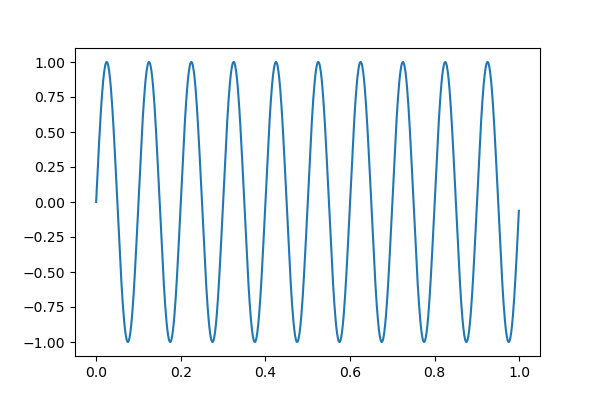

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
#Example sinusoidal

A = 1   # Amplitude
f = 10 # Hz, fundamental frequency or pitch 
fs = 1000  # Hz, sampling frequency

t = np.arange(0,1,1/fs)
s = A*np.sin(2*np.pi*f*t)

plt.figure(figsize = (6,4))

plt.plot(t,s)

Audio(s,rate = fs)


## Ejercicio 2. 
Represente la onda sinusoidal del ejercicio 1 para $f_0 = [5, 10] Hz$, compruebe gráficamente el valor de los $T_0$. Represente también el móulo de la $\mathcal{FFT}$ y compruebe gráficamente el valor de $f_0$.

<IPython.core.display.Javascript object>


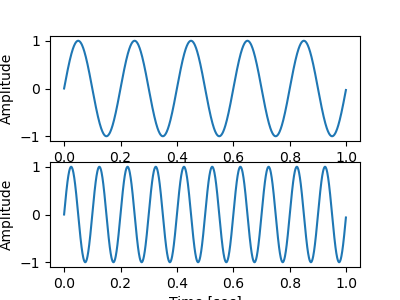

<IPython.core.display.Javascript object>


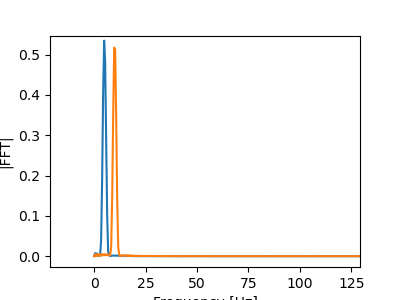

Text(0, 0.5, '|FFT|')

In [7]:
%matplotlib notebook
import sys
sys.path.append('../') #allows to import a module in a diff folder
from tds_utils_24 import my_spectra

A= 1  #amplitude
f1= 5 #Hz, fundamental frequency or pitch signal 1, 
f2= 10 # Hz, fundamental frequency or pitch frequency signal 2, 
fs= 1000 # Hz, sampling frequency

#generate temporal axes
t = np.arange(0,1,1/fs) 

#generate signals
s1= A*np.sin(2*np.pi*f1*t)
s2= A*np.sin(2*np.pi*f2*t)

#Plotting
plt.figure(figsize =(4,3))

plt.subplot(2,1,1)
plt.plot(t,s1)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')          
plt.subplot(2,1,2)
plt.plot(t,s2)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

#power spectral density estimation. First parameter the signal, second param the sampling frequency
psd1,f = my_spectra(s1,fs)
psd2,f = my_spectra(s2,fs)

#plot positive frequencies

plt.figure(figsize =(4,3))

idx = f>=0
plt.plot(f[idx],psd1[idx])
plt.plot(f[idx],psd2[idx])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

## Ejercicio 3

Observe las diferencias en el dominio del tiempo y en el dominio espectral entre señales de musicales y señales de voz.


-Fíjese en las **frecuencias de muestreo (fs)** de cada una de las señales:

    * ¿cuáles son? puede imprimir por pantalla (print) las diferentes fs.
  
  
    
-Fíjese en que una señal de audio puede tener más de un **canal**.


    *¿cómo extraemos uno de los canales para trabajar con él? puede imprimir por pantalla el tamaño de las estructuras en las que se guardan las señales (print(y.shape)).
    
-¿Cuáles corresponde a una **señal de voz** y cuáles a una **señal musical**?


    * Reproduzca las señales con la función Audio



<IPython.core.display.Javascript object>


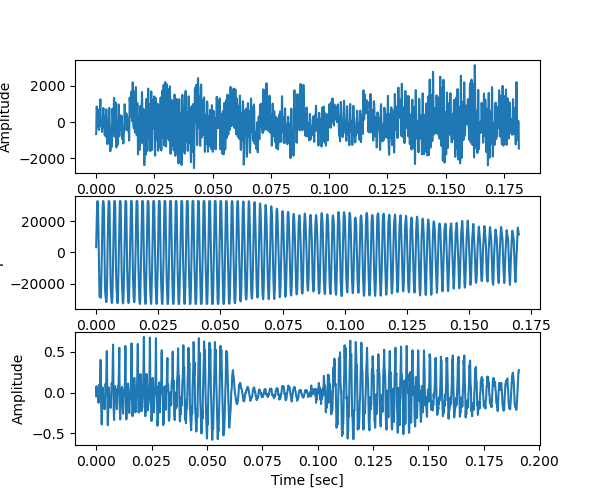

<IPython.core.display.Javascript object>


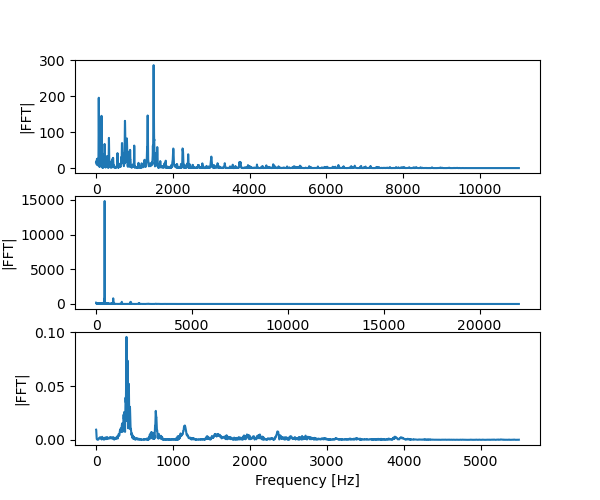

Text(0, 0.5, '|FFT|')

In [14]:
import scipy.io.wavfile as wf

#reading wave files
filename1 ='ejemploEj3_1_T4.wav'
filename2 = 'ejemploEj3_2_T4.wav'
filename3 = 'ejemploEj3_3_T4.wav'


fs1,y1 = wf.read(filename1)
trama1= y1[0:4000]
t1 = np.arange(0,len(trama1)/fs1,1/fs1)

fs2,y2 = wf.read(filename2)
trama2= y2[0:7500,0]
t2 = np.arange(0,len(trama2)/fs2,1/fs2)
y_2 = y2[:,0]

fs3,y3 = wf.read(filename3)
trama3= y3[2500:4600]
t3 = np.arange(0,(len(trama3))/fs3,1/fs3)


#plot signals
plt.figure(figsize = (6,5))

plt.subplot(3,1,1)
plt.plot(t1,trama1)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')         
plt.subplot(3,1,2)
plt.plot(t2,trama2)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.subplot(3,1,3)
plt.plot(t3,trama3)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

psd1,f1 = my_spectra(trama1,fs1)
psd2,f2 = my_spectra(trama2,fs2)
psd3,f3 = my_spectra(trama3,fs3)

#plot positive frequencies

plt.figure(figsize =(6,5))

idx1 = f1>=0
idx2 = f2>=0
idx3 = f3>=0


plt.subplot(3,1,1)
plt.plot(f1[idx1],psd1[idx1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')
plt.subplot(3,1,2)
plt.plot(f2[idx2],psd2[idx2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')
plt.subplot(3,1,3)
plt.plot(f3[idx3],psd3[idx3])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')



In [16]:
Audio(y3,rate = fs3)

In [13]:
print(y3.shape)

(19778,)


## Ejercicio 4

Represente el módulo de la FFT de una trama o segmento de la señal *ejemploEj4T4.wav* entre las muestras 2500 y 2830, identifique $f_0$ y y las frecuencias formantes.

<IPython.core.display.Javascript object>


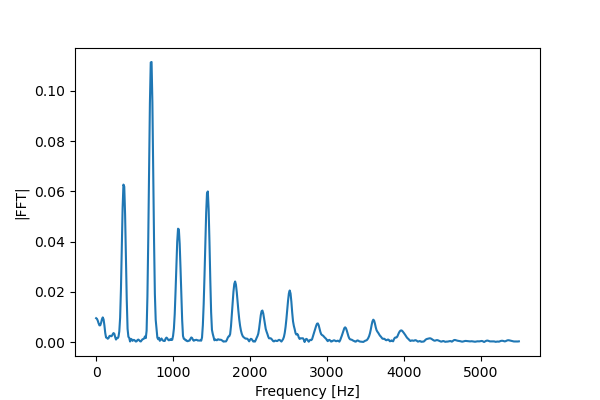

In [17]:
%matplotlib notebook

#reading wave files
filename = 'ejemploEj4T4.wav'
fs,y = wf.read(filename) 
trama= y[2500:2830]
t = np.arange(0,(len(trama))/fs,1/fs)


#get spectra

psd,f = my_spectra(trama,fs)

#plot spectra
plt.figure(figsize = (6,4))
idx = f>= 0
plt.plot(f[idx],psd[idx])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

Audio(trama,rate = fs)

## Ejercicio 5

Represente en el dominio temporal y en el dominio espectral los fragmentos de una señal de voz contenidos *ejemploEj5AT4.npy* y *ejemploEj5BT4.npy*, tome $fs = 11000\ Hz$. Identifique qué fragmento es sonoro y qué fragmento es sordo.

<IPython.core.display.Javascript object>


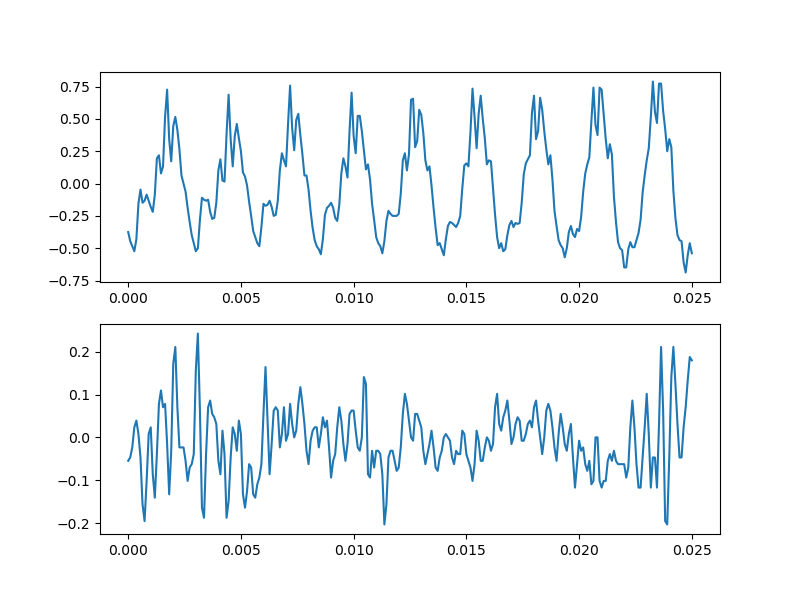

<IPython.core.display.Javascript object>


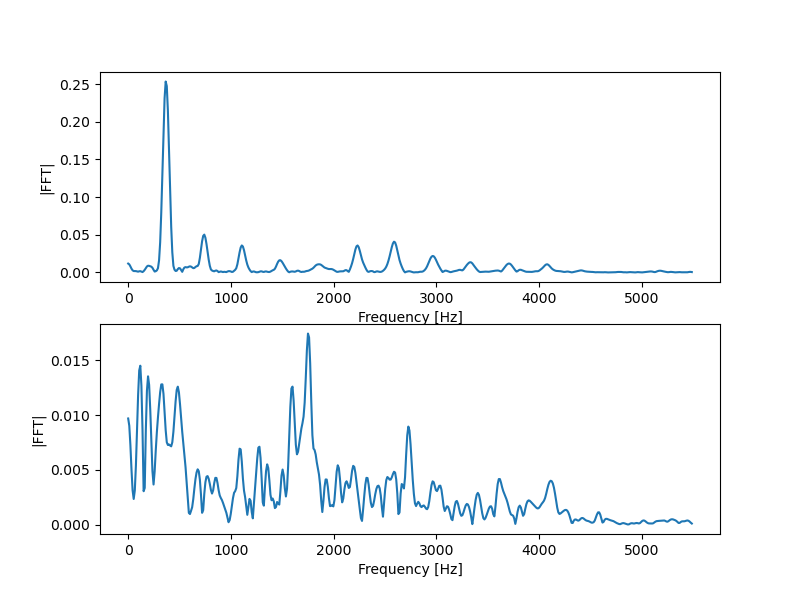

Text(0, 0.5, '|FFT|')

In [21]:
from IPython.display import Audio
#Load examples
trama1 = np.load('ejemploEj5AT4.npy')
trama2 = np.load('ejemploEj5BT4.npy')
fs = 11e3

#time vectors
t1 = np.arange(0,(len(trama1))/fs,1/fs)
t2 = np.arange(0,(len(trama2))/fs,1/fs)


#Plot segments

plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(t1,trama1) 

plt.subplot(212)
plt.plot(t2,trama2)

#power spectral density estimation 
psd1,f1 = my_spectra(trama1,fs)
psd2,f2 = my_spectra(trama2,fs)

#plot spectra
plt.figure(figsize = (8,6))
plt.subplot(211)
idx1 = f1>= 0
plt.plot(f1[idx1],psd1[idx1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

plt.subplot(212)
idx2 = f2>= 0
plt.plot(f2[idx2],psd2[idx2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')


In [20]:
print(trama2.shape)

(276, 1)
